In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [2]:
# Load your dataset
# Assume the dataset is in a CSV file
df = pd.read_csv('ML_Data_48.csv', index_col=0)

In [3]:
df.drop(['timestamp_range'], axis=1, inplace=True)

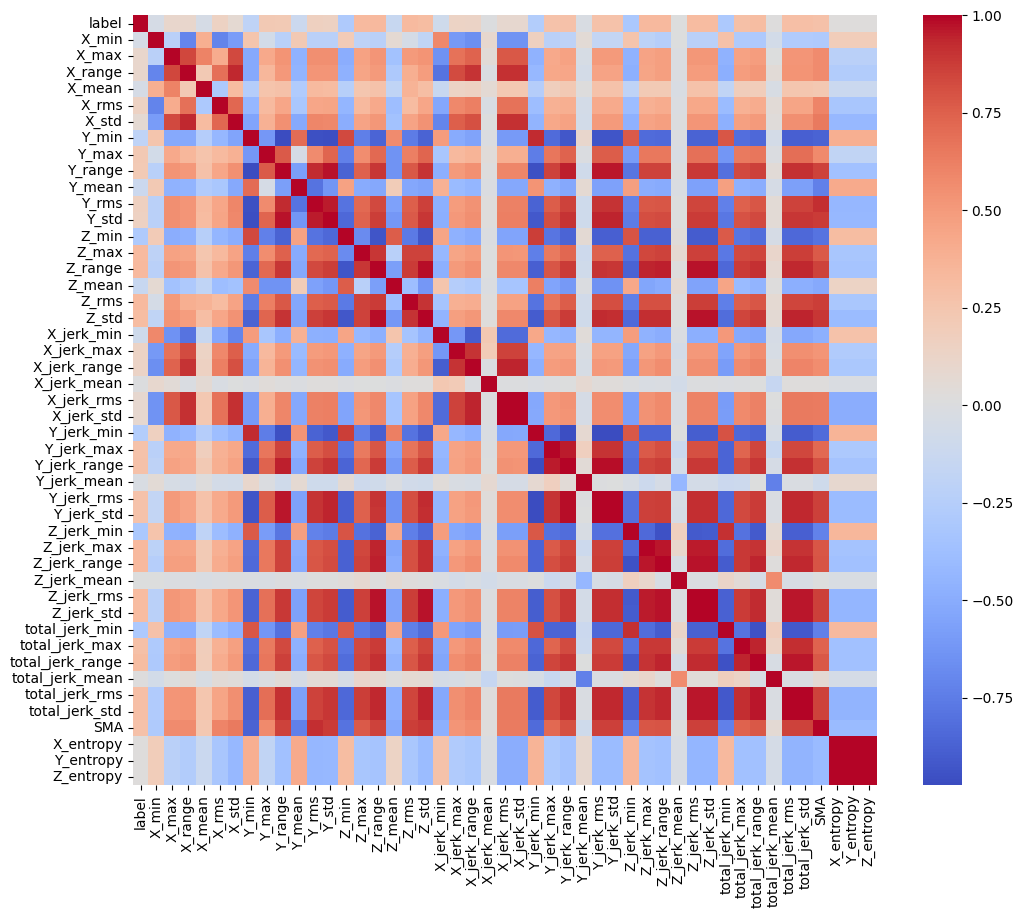

In [4]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [5]:
# Identify highly correlated features
threshold = 0.8
high_corr_var = np.where(np.abs(corr_matrix) > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

print("Highly correlated features (threshold > 0.8):")
for pair in high_corr_var:
    print(pair)

Highly correlated features (threshold > 0.8):
('X_max', 'X_range')
('X_max', 'X_std')
('X_range', 'X_std')
('X_range', 'X_jerk_max')
('X_range', 'X_jerk_range')
('X_range', 'X_jerk_rms')
('X_range', 'X_jerk_std')
('X_std', 'X_jerk_range')
('X_std', 'X_jerk_rms')
('X_std', 'X_jerk_std')
('Y_min', 'Y_range')
('Y_min', 'Y_rms')
('Y_min', 'Y_std')
('Y_min', 'Z_min')
('Y_min', 'Z_range')
('Y_min', 'Z_std')
('Y_min', 'Y_jerk_min')
('Y_min', 'Y_jerk_max')
('Y_min', 'Y_jerk_range')
('Y_min', 'Y_jerk_rms')
('Y_min', 'Y_jerk_std')
('Y_min', 'Z_jerk_max')
('Y_min', 'Z_jerk_range')
('Y_min', 'Z_jerk_rms')
('Y_min', 'Z_jerk_std')
('Y_min', 'total_jerk_max')
('Y_min', 'total_jerk_range')
('Y_min', 'total_jerk_rms')
('Y_min', 'total_jerk_std')
('Y_min', 'SMA')
('Y_range', 'Y_rms')
('Y_range', 'Y_std')
('Y_range', 'Z_min')
('Y_range', 'Z_range')
('Y_range', 'Z_std')
('Y_range', 'Y_jerk_min')
('Y_range', 'Y_jerk_max')
('Y_range', 'Y_jerk_range')
('Y_range', 'Y_jerk_rms')
('Y_range', 'Y_jerk_std')
('Y_r

In [6]:
# Feature importance using RandomForest
X = df.drop('label', axis=1)  # Assuming 'target' is the target column
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

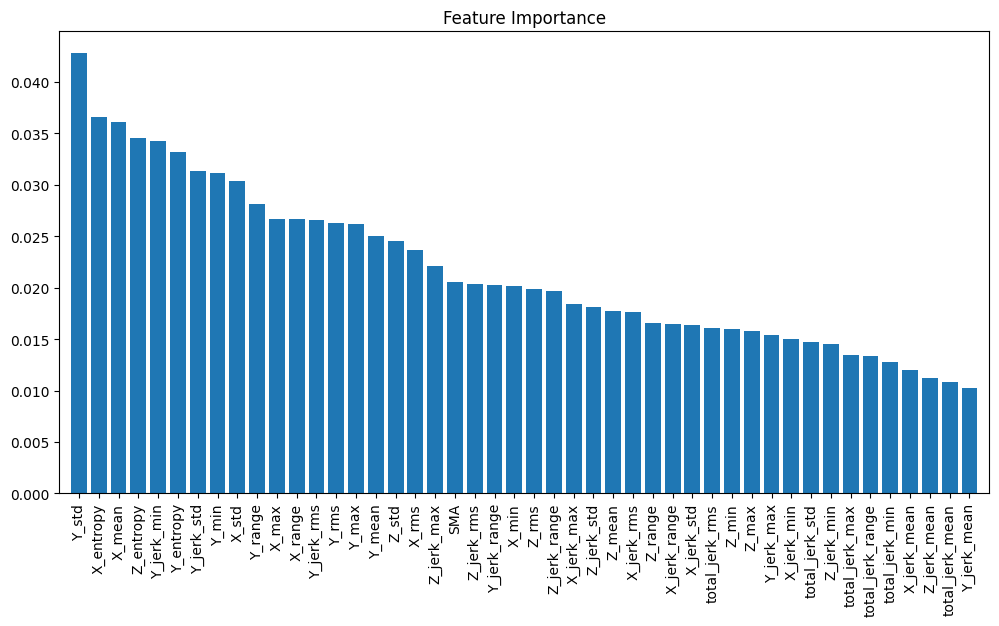

In [9]:
# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

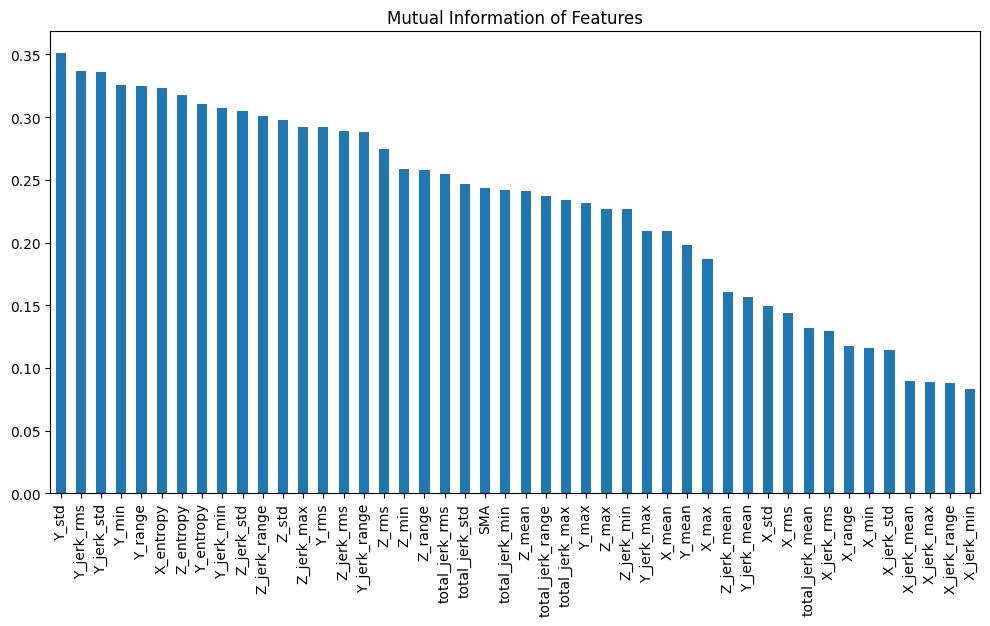

In [10]:
# Feature importance using mutual information
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi, index=X.columns)
mi.sort_values(ascending=False).plot.bar(figsize=(12, 6))
plt.title("Mutual Information of Features")
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

In [14]:
k = 47  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selector.fit(X_train,y_train)

/home/ette/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=47 is greater than n_features=46. All the features will be returned.
  warnings.warn(


SelectKBest(k=47, score_func=<function chi2 at 0x7a971188af20>)

In [15]:
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

In [16]:
scores = selector.scores_[selected_indices]

In [17]:
# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': selected_features, 'Chi2 Score': scores})
feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)

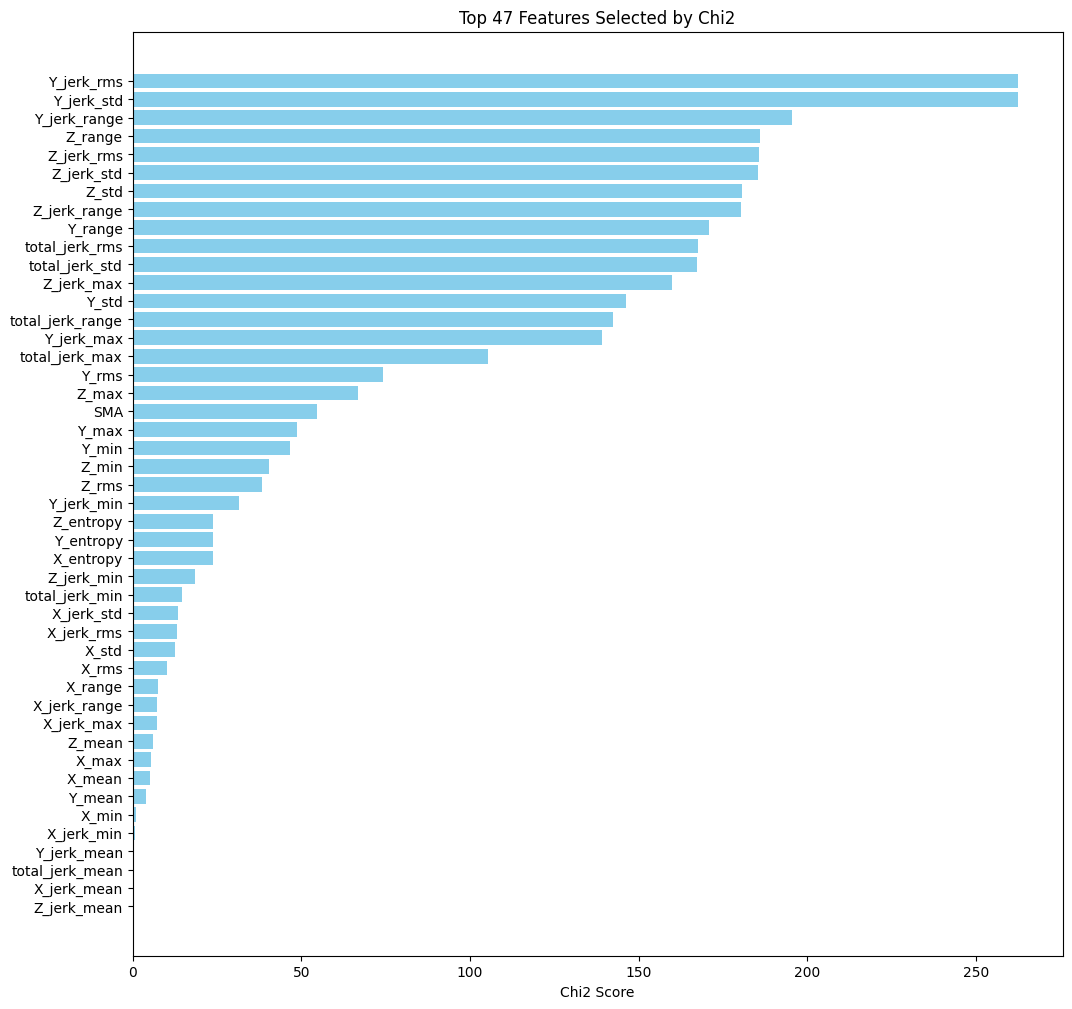

In [18]:
# Plot the Chi2 scores
plt.figure(figsize=(12, 12))
plt.barh(feature_scores['Feature'], feature_scores['Chi2 Score'], color='skyblue')
plt.xlabel('Chi2 Score')
plt.title('Top {} Features Selected by Chi2'.format(k))
plt.gca().invert_yaxis()
plt.savefig('./Chi_Square.png')
plt.show()

In [19]:
print("Selected Features:")
print(feature_scores)

Selected Features:
             Feature  Chi2 Score
28        Y_jerk_rms  262.580022
29        Y_jerk_std  262.532075
26      Y_jerk_range  195.557210
14           Z_range  186.084063
34        Z_jerk_rms  185.712591
35        Z_jerk_std  185.388311
17             Z_std  180.733955
32      Z_jerk_range  180.354797
8            Y_range  170.810667
40    total_jerk_rms  167.717203
41    total_jerk_std  167.430820
31        Z_jerk_max  160.018126
11             Y_std  146.250352
38  total_jerk_range  142.433858
25        Y_jerk_max  139.140595
37    total_jerk_max  105.282344
10             Y_rms   74.157572
13             Z_max   66.687912
42               SMA   54.785816
7              Y_max   48.862421
6              Y_min   46.550655
12             Z_min   40.495714
16             Z_rms   38.309721
24        Y_jerk_min   31.534686
45         Z_entropy   23.711898
44         Y_entropy   23.711898
43         X_entropy   23.711898
30        Z_jerk_min   18.379353
36    total_jerk_min   1

/tmp/ipykernel_5428/1461526352.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


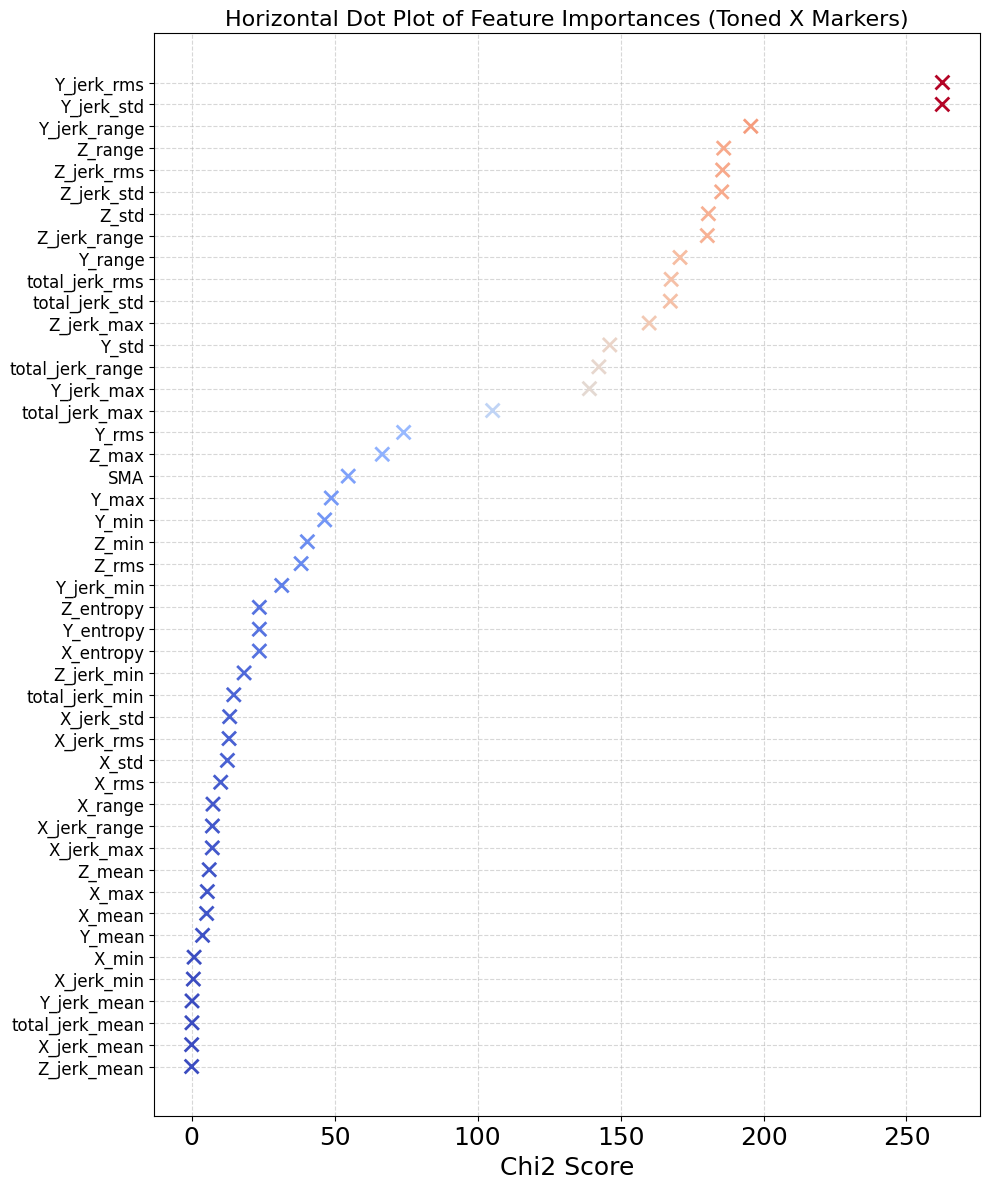

In [24]:
plt.figure(figsize=(10, 12))

# Enable background grid
plt.grid(True, axis='both', linestyle='--', alpha=0.5, zorder=0)

# Normalize Chi² scores for consistent colormap scaling
norm = plt.Normalize(feature_scores['Chi2 Score'].min(), feature_scores['Chi2 Score'].max())
colors = plt.cm.coolwarm(norm(feature_scores['Chi2 Score']))

# Horizontal scatter plot using 'x' as marker
plt.scatter(
    feature_scores['Chi2 Score'], 
    feature_scores['Feature'], 
    c=colors, 
    s=100, 
    edgecolors='black', 
    marker='x', 
    linewidths=2,
    zorder=2
)

plt.xlabel('Chi2 Score', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Horizontal Dot Plot of Feature Importances (Toned X Markers)', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('chi_square.png')
plt.show()

In [21]:
feature_scores['Feature']

28          Y_jerk_rms
29          Y_jerk_std
26        Y_jerk_range
14             Z_range
34          Z_jerk_rms
35          Z_jerk_std
17               Z_std
32        Z_jerk_range
8              Y_range
40      total_jerk_rms
41      total_jerk_std
31          Z_jerk_max
11               Y_std
38    total_jerk_range
25          Y_jerk_max
37      total_jerk_max
10               Y_rms
13               Z_max
42                 SMA
7                Y_max
6                Y_min
12               Z_min
16               Z_rms
24          Y_jerk_min
45           Z_entropy
44           Y_entropy
43           X_entropy
30          Z_jerk_min
36      total_jerk_min
23          X_jerk_std
22          X_jerk_rms
5                X_std
4                X_rms
2              X_range
20        X_jerk_range
19          X_jerk_max
15              Z_mean
1                X_max
3               X_mean
9               Y_mean
0                X_min
18          X_jerk_min
27         Y_jerk_mean
39     tota

/tmp/ipykernel_5428/2874359863.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


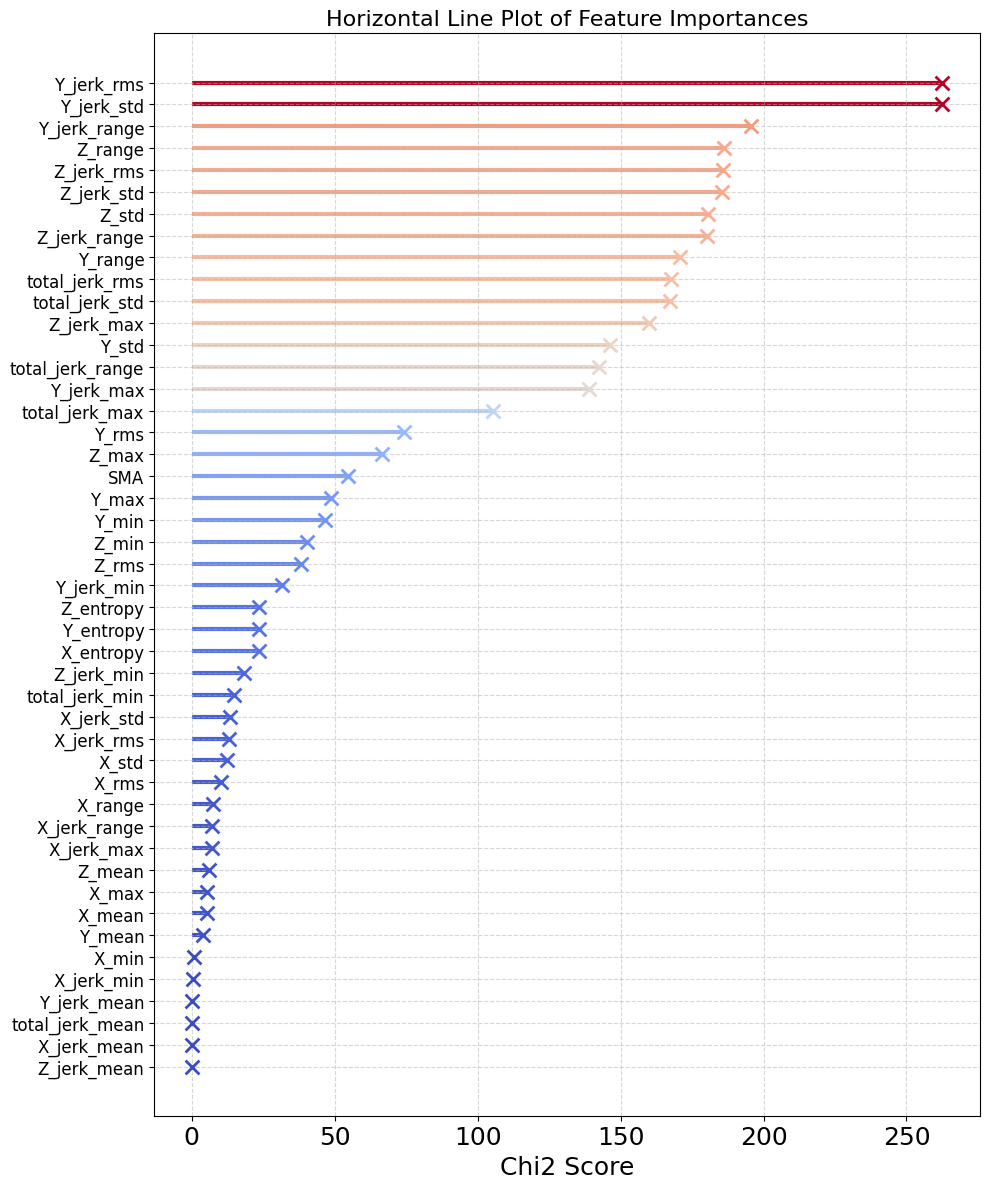

In [29]:
import matplotlib.pyplot as plt

# Sort the feature_scores DataFrame by 'Chi2 Score' in descending order
sorted_feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)

plt.figure(figsize=(10, 12))

# Enable background grid
plt.grid(True, axis='both', linestyle='--', alpha=0.5, zorder=0)

# Normalize Chi² scores for consistent colormap scaling
norm = plt.Normalize(sorted_feature_scores['Chi2 Score'].min(), sorted_feature_scores['Chi2 Score'].max())
colors = plt.cm.coolwarm(norm(sorted_feature_scores['Chi2 Score']))

# Create horizontal lines for Chi² scores
for i, feature in enumerate(sorted_feature_scores['Feature']):
    plt.hlines(
        y=i, 
        xmin=0, 
        xmax=sorted_feature_scores['Chi2 Score'].iloc[i], 
        color=colors[i], 
        linewidth=3, 
        zorder=1
    )

# Add 'x' markers at the end of each line
for i, feature in enumerate(sorted_feature_scores['Feature']):
    plt.scatter(
        sorted_feature_scores['Chi2 Score'].iloc[i], 
        i, 
        c=[colors[i]], 
        s=100, 
        edgecolors='black', 
        marker='x', 
        linewidths=2, 
        zorder=2
    )

# Set the y-axis labels to feature names
plt.yticks(ticks=range(len(sorted_feature_scores['Feature'])), labels=sorted_feature_scores['Feature'], fontsize=12)

plt.xlabel('Chi2 Score', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Horizontal Line Plot of Feature Importances', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('chi_square_line_plot_sorted.png')
plt.show()
